<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Load the handwritten digit dataset

In [2]:
from keras.datasets import mnist

In [3]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [4]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
xtest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### Viewing the image data

In [8]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

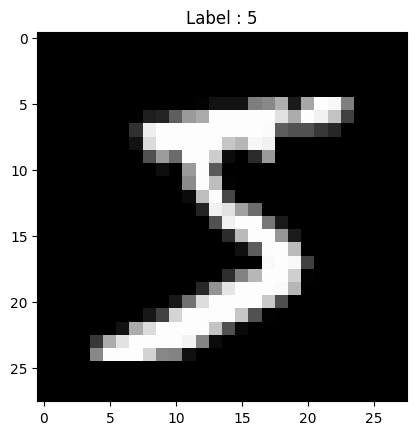

In [9]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap="gray")
plt.title(f"Label : {ytrain[0]}")
plt.show()

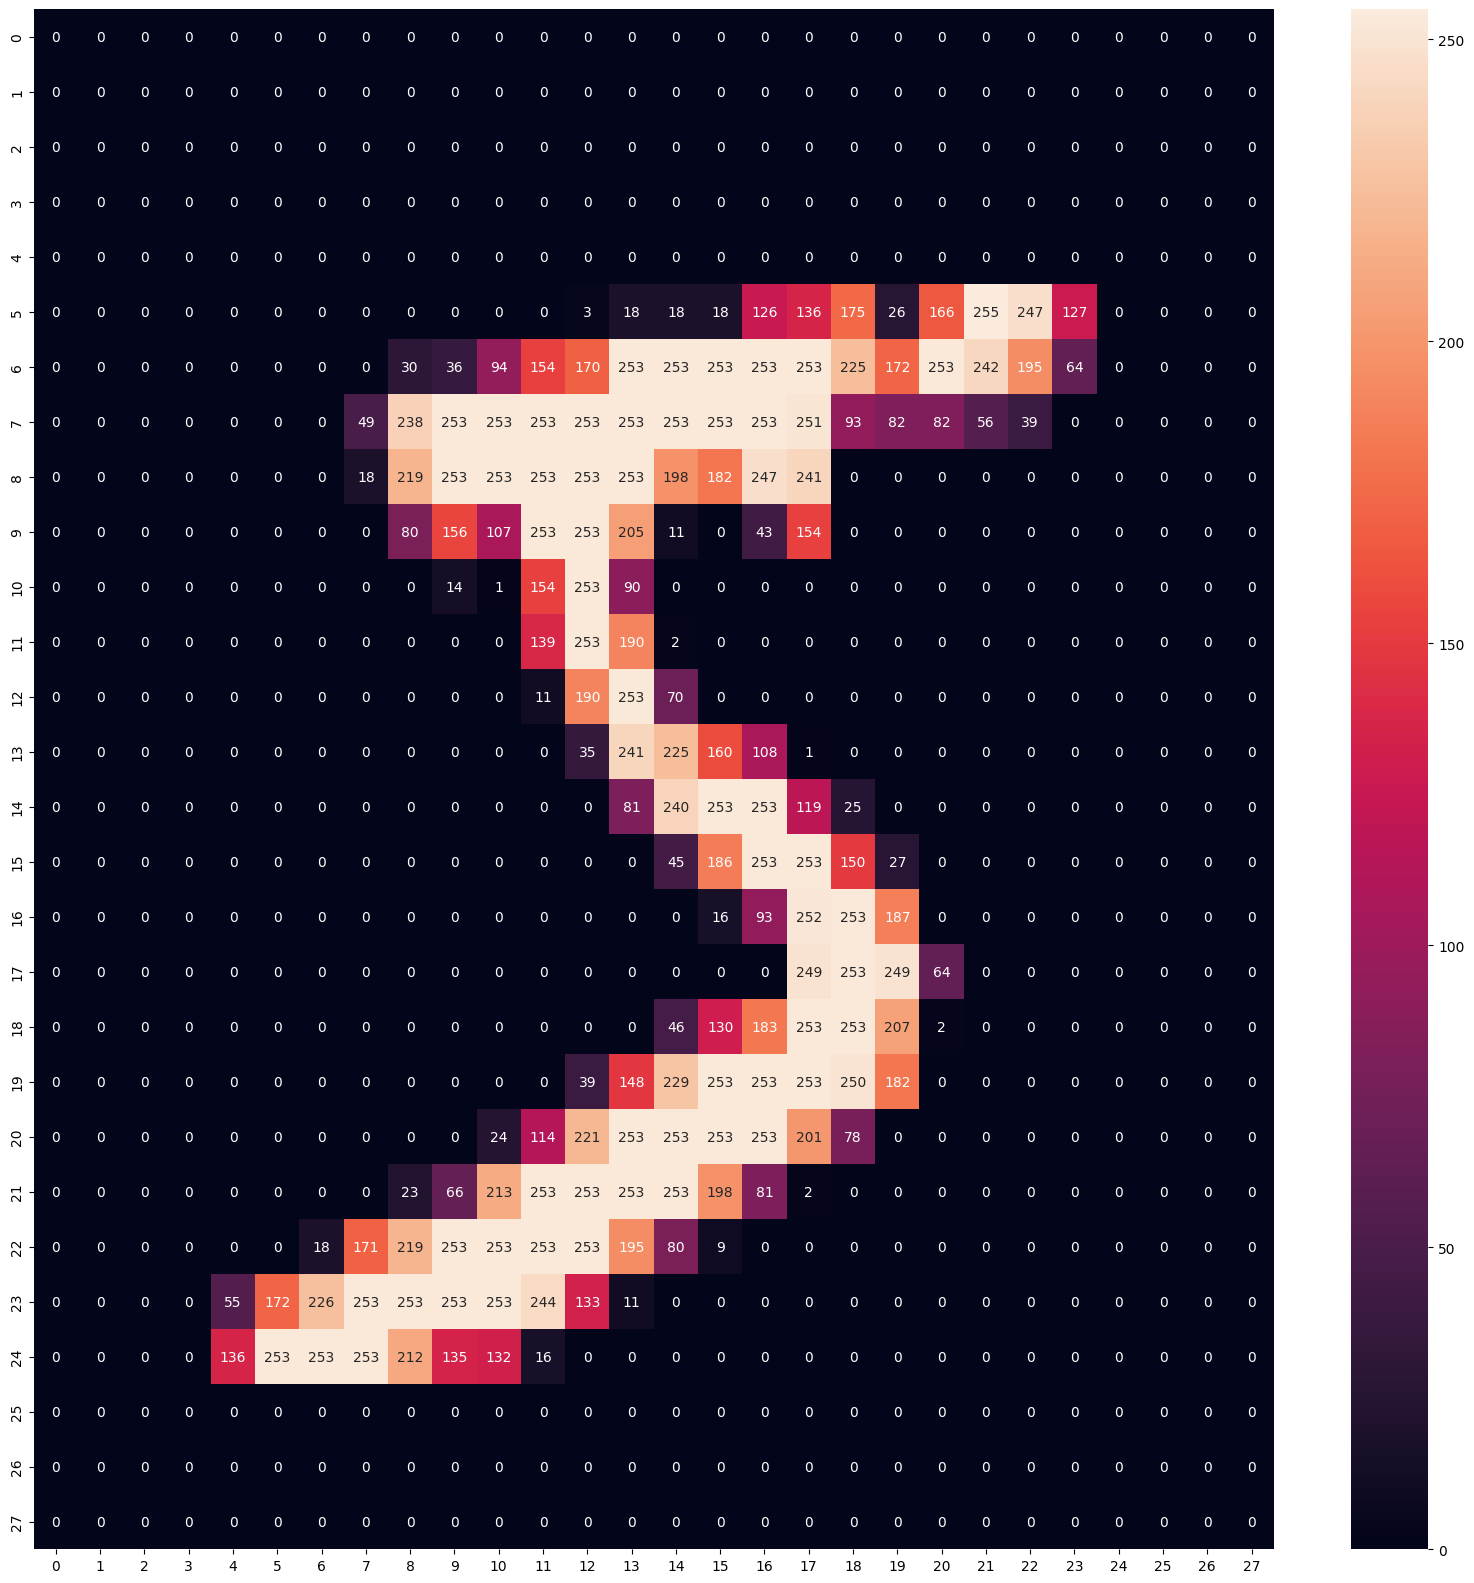

In [10]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(xtrain[0], annot=True, fmt="d")
plt.show()

### Show first 9 images

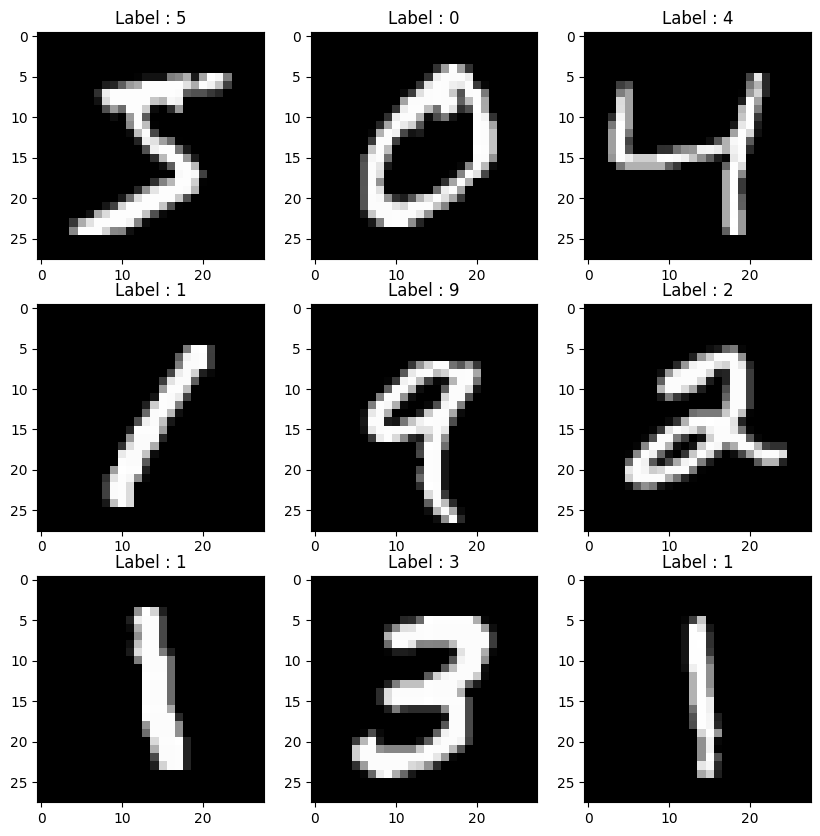

In [11]:
plt.figure(figsize=(10, 10))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtrain[i], cmap="gray")
  plt.title(f"Label : {ytrain[i]}")

In [12]:
xtrain.shape

(60000, 28, 28)

In [13]:
xtest.shape

(10000, 28, 28)

### Preprocess the data for training

In [14]:
xtrain_pre = xtrain.astype(float)/255
xtest_pre = xtest.astype(float)/255

In [15]:
xtrain_pre[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
xtest_pre[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
from keras.utils import to_categorical
ytrain_pre = to_categorical(ytrain)
ytest_pre = to_categorical(ytest)

In [18]:
ytrain[0]

5

In [19]:
ytrain_pre[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [20]:
ytest[0]

7

In [21]:
ytest_pre[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

### Build the CNN

In [22]:
xtrain.shape

(60000, 28, 28)

In [23]:
input_shape = (28, 28, 1)

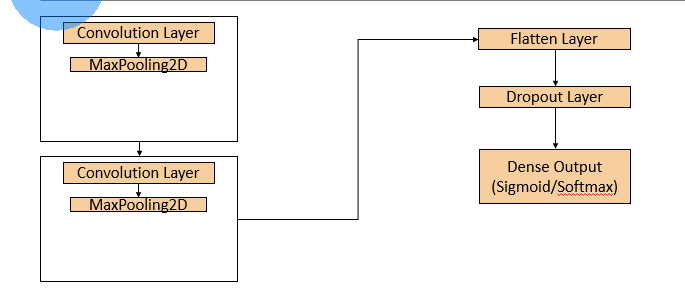

In [24]:
import numpy as np
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
output_labels = len(np.unique(ytrain))
output_labels

10

In [26]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, Input

In [27]:
# Intialize the model
model = Sequential()

# Provide the input layer
model.add(Input(shape=input_shape))

# First convlution layer
model.add(Convolution2D(filters=32, kernel_size=(3, 3), activation="relu"))
# Max pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Second convolution layer
model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation="relu"))
# Max pooling 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Add a dropout layer
model.add(Dropout(rate=0.5))

# Add softmax output layer for multiclass classification
model.add(Dense(units= output_labels, activation="softmax"))

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
hist = model.fit(xtrain_pre, ytrain_pre, validation_split=0.1, epochs=15, batch_size=128)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7546 - loss: 0.7775 - val_accuracy: 0.9758 - val_loss: 0.0865
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9635 - loss: 0.1225 - val_accuracy: 0.9857 - val_loss: 0.0574
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9739 - loss: 0.0847 - val_accuracy: 0.9862 - val_loss: 0.0520
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9758 - loss: 0.0781 - val_accuracy: 0.9897 - val_loss: 0.0394
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9812 - loss: 0.0595 - val_accuracy: 0.9893 - val_loss: 0.0398
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9839 - loss: 0.0536 - val_accuracy: 0.9915 - val_loss: 0.0332
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9846 - loss: 0.0481 - val_accuracy: 0.9915 - val_loss: 0.0325
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9863 - loss: 0.0439 - val_accuracy: 0

### Plot the learning curve

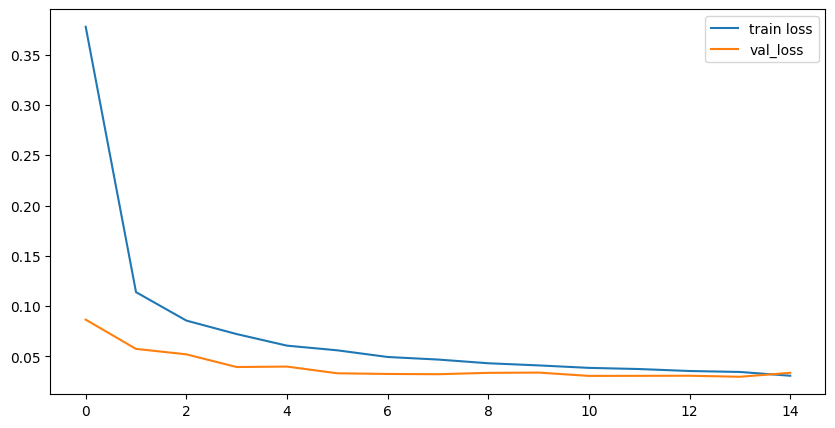

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="train loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

### Evaluate the model

In [32]:
model.evaluate(xtrain_pre, ytrain_pre)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9953 - loss: 0.0158


[0.017590921372175217, 0.994866669178009]

In [33]:
model.evaluate(xtest_pre, ytest_pre)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0332


[0.027050912380218506, 0.9911999702453613]

In [46]:
xtrain.shape

(60000, 28, 28)

In [47]:
yprob_train = model.predict(xtrain_pre.reshape(60000, 28, 28, 1))
yprob_train

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


array([[2.6019921e-11, 3.1734199e-10, 2.9564764e-09, ..., 5.3328142e-07,
        2.5733587e-07, 5.1964616e-06],
       [9.9998522e-01, 2.0410947e-15, 6.6473621e-07, ..., 8.6708227e-12,
        2.0064826e-07, 1.2967099e-07],
       [1.5500325e-13, 5.6324338e-06, 1.3609383e-08, ..., 6.7821238e-05,
        7.3079896e-08, 1.3546911e-05],
       ...,
       [4.5256941e-13, 5.4599381e-12, 3.7630245e-14, ..., 1.0600229e-12,
        1.7844179e-08, 8.8680454e-06],
       [8.2920633e-07, 1.5084151e-08, 4.4746727e-08, ..., 3.5810816e-11,
        8.8091537e-07, 1.0029098e-09],
       [1.1340530e-05, 3.3865524e-10, 6.0208658e-06, ..., 9.5217058e-07,
        9.9991930e-01, 6.1061844e-05]], dtype=float32)

In [48]:
yprob_train[0]

array([2.6019921e-11, 3.1734199e-10, 2.9564764e-09, 1.1841127e-02,
       1.7111334e-12, 9.8815292e-01, 8.0370146e-12, 5.3328142e-07,
       2.5733587e-07, 5.1964616e-06], dtype=float32)

In [50]:
ypred_train = np.argmax(yprob_train, axis=1)
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [52]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [53]:
xtest.shape

(10000, 28, 28)

In [54]:
yprob_test = model.predict(xtest_pre.reshape(10000, 28, 28, 1))
yprob_test[0:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[5.4473499e-11, 1.1055323e-10, 1.4382276e-06, 4.5907487e-07,
        4.1612297e-13, 6.4309699e-12, 6.6470952e-19, 9.9999785e-01,
        5.5538391e-10, 2.6992689e-07],
       [4.7833441e-06, 1.2849487e-05, 9.9989164e-01, 7.2435800e-09,
        3.8470635e-10, 6.9704279e-13, 8.6644475e-05, 4.0248654e-10,
        4.0317846e-06, 4.8466679e-11],
       [3.4460765e-08, 9.9975079e-01, 6.8820714e-07, 3.1478368e-08,
        1.4459787e-04, 3.6398399e-07, 6.8788830e-07, 9.3653769e-05,
        8.7905728e-06, 3.8405344e-07],
       [9.9982232e-01, 2.6404264e-13, 3.2212354e-06, 3.8420488e-08,
        1.1031678e-08, 7.3944520e-08, 1.7303061e-04, 1.0441138e-08,
        8.3652026e-07, 5.2368875e-07],
       [1.2581613e-08, 4.5397613e-10, 7.6853990e-09, 1.0865217e-09,
        9.9986756e-01, 3.5472686e-10, 7.0518458e-09, 9.4293995e-08,
        1.7261238e-08, 1.3230891e-04]], dtype=float32)

In [55]:
ypred_test = np.argmax(yprob_test, axis=1)
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [56]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

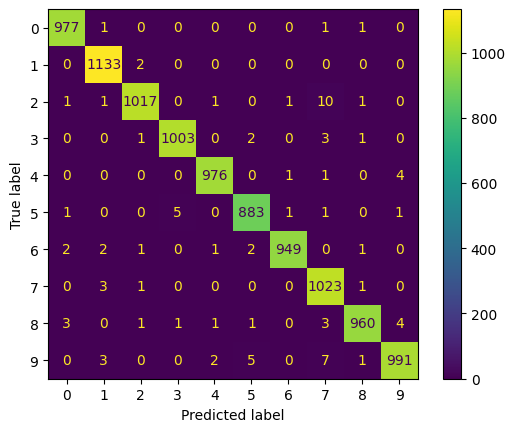

In [57]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      1.00      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### From above test data has f1_macro of 0.99 which > 0.8 hence it is a goood model

In [35]:
import cv2

In [60]:
def predict_label(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap="gray")
  plt.show()
  img = img.astype(float)/255
  probs = model.predict(img.reshape(1, 28, 28, 1))
  pred = np.argmax(probs, axis=1)
  return pred, np.max(probs)

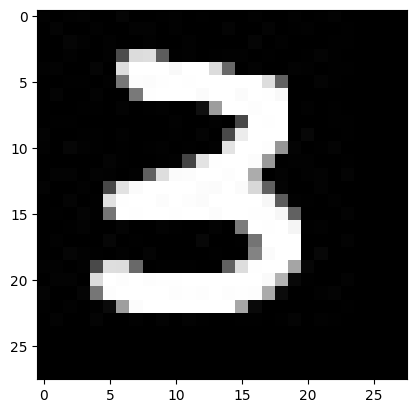

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


(array([3]), 1.0)

In [61]:
predict_label("/content/Img_3.jpg")

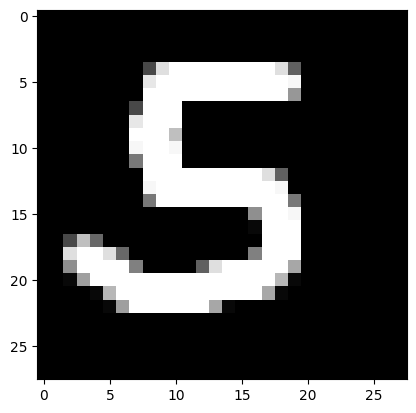

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


(array([5]), 1.0)

In [62]:
predict_label("/content/Img_5.png")

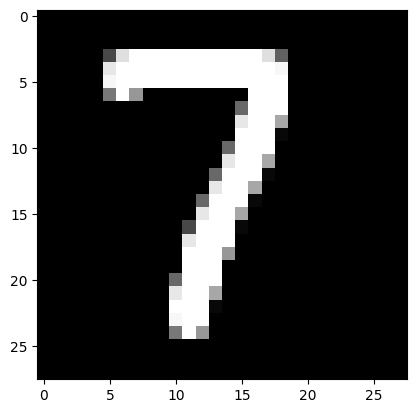

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


(array([7]), 0.98885566)

In [63]:
predict_label("/content/Img_7.png")

### Save the model

In [64]:
model.save("DigitModel.keras")

### Load the model

In [65]:
from keras.models import load_model

In [66]:
m = load_model("/content/DigitModel.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,480 (408.13 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)